# Coarsening on the ROMS C-Grid

In [1]:
from IPython.display import Image, display

# Display the image from the URL
display(Image(url='https://github.com/user-attachments/assets/3f8ca3be-8b17-4187-bb26-311ba41bf1d5'))

### Reading grid information and data

In [2]:
import xarray as xr

In [3]:
# Read grid information
ds_grid = xr.open_dataset("/glade/derecho/scratch/bachman/UCLA-ROMS/Work/Iceland1/INPUT/Iceland1_grd.nc")

In [4]:
ds_grid

<xarray.Dataset> Size: 96MB
Dimensions:       (one: 1, eta_rho: 1082, xi_rho: 1082, eta_coarse: 542,
                   xi_coarse: 542)
Dimensions without coordinates: one, eta_rho, xi_rho, eta_coarse, xi_coarse
Data variables: (12/19)
    spherical     (one) |S1 1B ...
    angle         (eta_rho, xi_rho) float64 9MB ...
    h             (eta_rho, xi_rho) float64 9MB ...
    hraw          (eta_rho, xi_rho) float64 9MB ...
    f             (eta_rho, xi_rho) float64 9MB ...
    pm            (eta_rho, xi_rho) float64 9MB ...
    ...            ...
    xy_flip       (one) float64 8B ...
    lon_coarse    (eta_coarse, xi_coarse) float64 2MB ...
    lat_coarse    (eta_coarse, xi_coarse) float64 2MB ...
    angle_coarse  (eta_coarse, xi_coarse) float64 2MB ...
    h_coarse      (eta_coarse, xi_coarse) float64 2MB ...
    mask_coarse   (eta_coarse, xi_coarse) float64 2MB ...
Attributes:
    Title:    ROMS grid by Easy Grid. Settings: nx: 1080 ny: 1080 xsize: 1080...
    Date:     26-Jul-2023
    Type:     ROMS grid produced by Easy Grid

In [5]:
# Read some data
ds = xr.open_dataset("/glade/derecho/scratch/bachman/UCLA-ROMS/run/Iceland1/AVG/Iceland1_avg.20120402000000.nc")

In [6]:
ds

<xarray.Dataset> Size: 2GB
Dimensions:     (time: 1, auxil: 6, eta_rho: 1082, xi_rho: 1082, s_rho: 100,
                 xi_u: 1081, eta_v: 1081, s_w: 101)
Dimensions without coordinates: time, auxil, eta_rho, xi_rho, s_rho, xi_u,
                                eta_v, s_w
Data variables:
    ocean_time  (time) float64 8B ...
    time_step   (time, auxil) int32 24B ...
    zeta        (time, eta_rho, xi_rho) float32 5MB ...
    u           (time, s_rho, eta_rho, xi_u) float32 468MB ...
    v           (time, s_rho, eta_v, xi_rho) float32 468MB ...
    temp        (time, s_rho, eta_rho, xi_rho) float32 468MB ...
    salt        (time, s_rho, eta_rho, xi_rho) float32 468MB ...
    Akt         (time, s_w, eta_rho, xi_rho) float32 473MB ...
Attributes: (12/35)
    title:                 Iceland1 , 1.0km resolution
    grid_file:             /glade/derecho/scratch/bachman/UCLA-ROMS/Work/Icel...
    init_file:             /glade/derecho/scratch/bachman/UCLA-ROMS/Work/Icel...
    ntimes:                1441
    ndtfast:               80
    dt:                    60.0
    ...                    ...
    SRCS:                  KRNSRC param.F dimensions.F read_write.F ocean_var...
    CPPS:                  <cppdefs.opt> TWAKE DIAGNOSTICS TIDES BULK_FRC SPO...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_EAST, OBC_NORTH, OBC_SOUTH, OBC_M3O...
    git_version:           00d09a3fbd3fa41cc50b679742b7f4b4832d5df3
    type:                  ROMS averages file

### The `ROMSCoarsener` object

In [7]:
from coarsen import ROMSCoarsener

In [8]:
# Initialize ROMSCoarsener object with grid information
coarsener = ROMSCoarsener(ds_grid=ds_grid)

The `ROMSCoarsener` object will figure out whether you give it a tracer, u- or v-field. Let's try it out!

In [9]:
%time zeta_coarsened = coarsener(ds["zeta"], factor=4)

CPU times: user 53.4 ms, sys: 4.15 ms, total: 57.5 ms
Wall time: 59.3 ms


The 3D fields take a little more time:

In [10]:
%time temp_coarsened = coarsener(ds["temp"], factor=4)

CPU times: user 3.73 s, sys: 816 ms, total: 4.55 s
Wall time: 6.01 s


In [11]:
%time u_coarsened = coarsener(ds["u"], factor=4)

CPU times: user 7.03 s, sys: 327 ms, total: 7.35 s
Wall time: 9.01 s


In [12]:
%time v_coarsened = coarsener(ds["v"], factor=4)

CPU times: user 6.85 s, sys: 373 ms, total: 7.22 s
Wall time: 9.21 s


Note, however, that the `ROMSCoarsener` will work for fields with arbitrary dimensions (3D, 4D, ...) - it will simply coarsen over the `eta` and `xi` dimensions.

### Some plots

In [13]:
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Sea surface height')

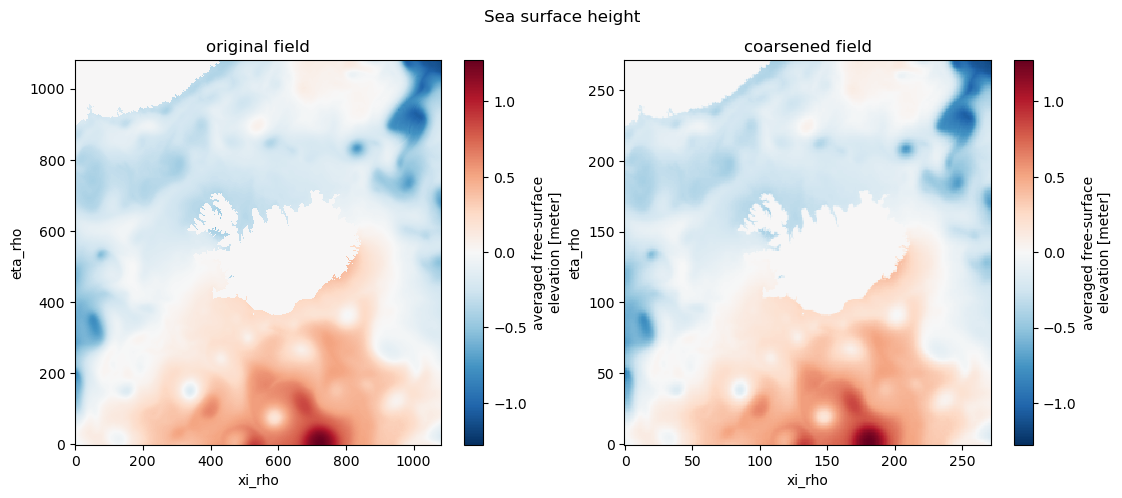

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

ds["zeta"].plot(ax=axs[0])
axs[0].set_title("original field")
zeta_coarsened.plot(ax=axs[1])
axs[1].set_title("coarsened field")

fig.suptitle("Sea surface height")

Text(0.5, 0.98, 'Surface zonal velocity')

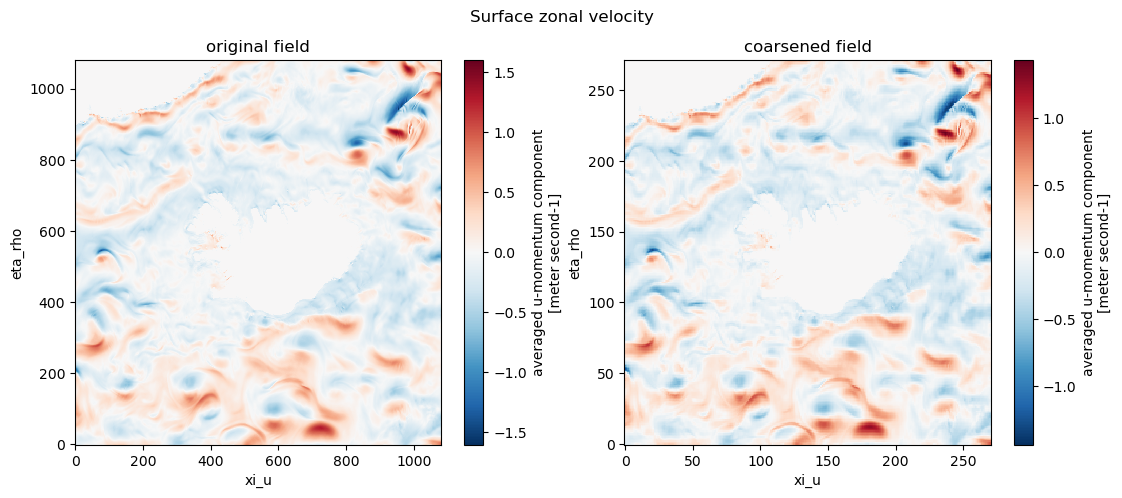

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

ds["u"].isel(s_rho=-1).plot(ax=axs[0])
axs[0].set_title("original field")
u_coarsened.isel(s_rho=-1).plot(ax=axs[1])
axs[1].set_title("coarsened field")

fig.suptitle("Surface zonal velocity")            

Text(0.5, 0.98, 'Surface meridional velocity')

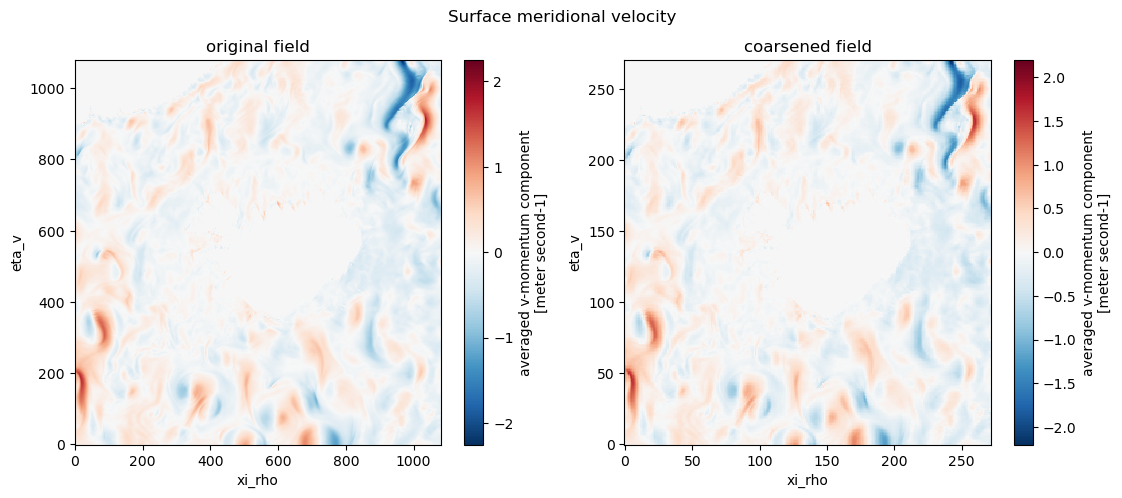

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

ds["v"].isel(s_rho=-1).plot(ax=axs[0])
axs[0].set_title("original field")
v_coarsened.isel(s_rho=-1).plot(ax=axs[1])
axs[1].set_title("coarsened field")

fig.suptitle("Surface meridional velocity")   

You will receive an error if you choose an invalid coarsening factor.

In [23]:
%time zeta_coarsened = coarsener(ds["zeta"], factor=7)

ValueError: Dimension (len(eta_rho) - 2) must be divisible by factor 7.